<h1 align="center">Introduction to Machine Learning</h1>
<h4 align="center">Instructor : Dr. Shamsollahi</h4>
<h4 align="center">Electerical Engineering department of Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 1</h4>
<h4 align="center">feel free to ask any questions via telegram from the Teaching Assistant(@Mam1381)


## Distribution estimation
In this part we are going to estimate the distribution function of a random variable from a sample dataset which has been generated from that distribution. We have a dataset with 1000 samples which are in a excel file that has been given to you.

To estimate the distribution, we are going to use a method which is called parzen window. In this method we will replace each sample by a guassian distribution with a known variance and the mean value of that sample data. At the end ,we will add these distributions and divide the whole distribution by the number of the samples.
Plot the estimated distribution with values of $\sigma =0.5$, $\sigma =1$ ,$\sigma =1.5$ and $\sigma =2$ for the gaussian distribution function and calculate the means and variances for the estimated distributions.

How does the means and variances change when you change the $\sigma$?

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("Q1_samples.xlsx")
data = data.to_numpy()[:,1]

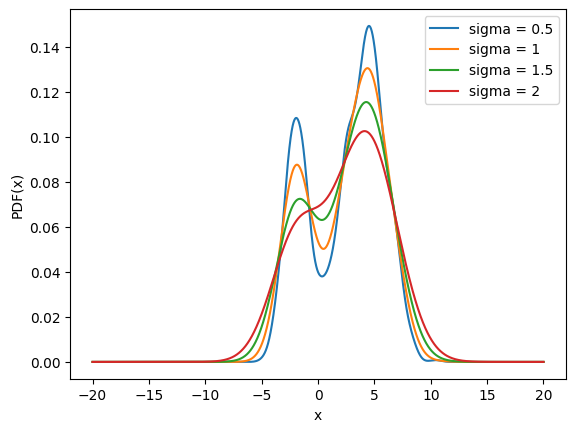

sigma = 0.5 --------> Var =  10.829127204073574 Mean =  2.3366270162015947
sigma = 1.0 --------> Var =  11.579052204073571 Mean =  2.336627016201595
sigma = 1.5 --------> Var =  12.828927204045439 Mean =  2.336627016199817
sigma = 2.0 --------> Var =  14.578751915643037 Mean =  2.3366269981610874


In [ ]:
def ParzenWindow(x,data,sigma):
	k=0
	for i in data:
		k += sp.stats.norm.pdf((x-i)/sigma,loc=0,scale=1)
	p=k/(len(data)*sigma)
	return p

resolution = 10000 # number of samples
# start and end of the x period
start_x = -20
end_x = 20
x = np.linspace(start_x,end_x,num=resolution)

fx_1 = ParzenWindow(x,data,0.5)
fx_2 = ParzenWindow(x,data,1)
fx_3 = ParzenWindow(x,data,1.5)
fx_4 = ParzenWindow(x,data,2)

plt.figure()
plt.plot(x, fx_1)
plt.plot(x, fx_2)
plt.plot(x, fx_3)
plt.plot(x, fx_4)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.legend(["sigma = 0.5", "sigma = 1", "sigma = 1.5", "sigma = 2"])
plt.show()

# Using reimann sum instead of integral
width = (end_x - start_x)/resolution

mean_1 = np.sum(x * fx_1 * width)
mean_2 = np.sum(x * fx_2 * width)
mean_3 = np.sum(x * fx_3 * width)
mean_4 = np.sum(x * fx_4 * width)

var_1 = np.sum((x-mean_1)**2 * fx_1 * width)
var_2 = np.sum((x-mean_2)**2 * fx_2 * width)
var_3 = np.sum((x-mean_3)**2 * fx_3 * width)
var_4 = np.sum((x-mean_4)**2 * fx_4 * width)

print("sigma = 0.5 --------> Var = ", var_1, "Mean = ", mean_1)
print("sigma = 1.0 --------> Var = ", var_2, "Mean = ", mean_2)
print("sigma = 1.5 --------> Var = ", var_3, "Mean = ", mean_3)
print("sigma = 2.0 --------> Var = ", var_4, "Mean = ", mean_4)

**As sigma increases, we observe a larger variance while the mean remains approximately constant.**

به نظر می‌رسد که توزیع داده‌ها از جمع دو تابع گاوسی پیروی می‌کند که یکی میانگین منفی و دیگری میانگین مثبت دارد

Now try to guess the distribution that these samples has been generated from.

**Question 2:**

In this question we are going to use the Naive Bayes and KNN algorithms to classify a dataset. You are free to use any function that you need from the sklearn library.

First, read the dataset as a dataframe with pandas library.

In [ ]:
import pandas as pd
data = pd.read_csv("Q2_dataset.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As you see, some of the columns of our dataset are categorical and not numerical. Search about the dummy variables in the internet and make these dummy variables for the categorical columns. For the columns that just have 2 values, you can drop the column related to one of the dummy variables to reduce the dimension of your data.

In [ ]:
dummy = pd.get_dummies(data["gender"], prefix="gender")
data = pd.concat([data, dummy["gender_Male"]], axis=1)

dummy = pd.get_dummies(data["Partner"], prefix="Partner")
data = pd.concat([data, dummy["Partner_Yes"]], axis=1)

dummy = pd.get_dummies(data["Dependents"], prefix="Dependents")
data = pd.concat([data, dummy["Dependents_Yes"]], axis=1)

dummy = pd.get_dummies(data["PhoneService"], prefix="PhoneService")
data = pd.concat([data, dummy["PhoneService_Yes"]], axis=1)

dummy = pd.get_dummies(data["MultipleLines"], prefix="MultipleLines")
data = pd.concat([data, dummy["MultipleLines_Yes"]], axis=1)
data = pd.concat([data, dummy["MultipleLines_No"]], axis=1)
data = pd.concat([data, dummy["MultipleLines_No phone service"]], axis=1)

dummy = pd.get_dummies(data["InternetService"], prefix="InternetService")
data = pd.concat([data, dummy["InternetService_DSL"]], axis=1)
data = pd.concat([data, dummy["InternetService_Fiber optic"]], axis=1)
data = pd.concat([data, dummy["InternetService_No"]], axis=1)

dummy = pd.get_dummies(data["OnlineSecurity"], prefix="OnlineSecurity")
data = pd.concat([data, dummy["OnlineSecurity_Yes"]], axis=1)
data = pd.concat([data, dummy["OnlineSecurity_No"]], axis=1)
data = pd.concat([data, dummy["OnlineSecurity_No internet service"]], axis=1)

dummy = pd.get_dummies(data["OnlineBackup"], prefix="OnlineBackup")
data = pd.concat([data, dummy["OnlineBackup_Yes"]], axis=1)
data = pd.concat([data, dummy["OnlineBackup_No"]], axis=1)
data = pd.concat([data, dummy["OnlineBackup_No internet service"]], axis=1)

dummy = pd.get_dummies(data["DeviceProtection"], prefix="DeviceProtection")
data = pd.concat([data, dummy["DeviceProtection_Yes"]], axis=1)
data = pd.concat([data, dummy["DeviceProtection_No"]], axis=1)
data = pd.concat([data, dummy["DeviceProtection_No internet service"]], axis=1)

dummy = pd.get_dummies(data["TechSupport"], prefix="TechSupport")
data = pd.concat([data, dummy["TechSupport_Yes"]], axis=1)
data = pd.concat([data, dummy["TechSupport_No"]], axis=1)
data = pd.concat([data, dummy["TechSupport_No internet service"]], axis=1)

dummy = pd.get_dummies(data["StreamingTV"], prefix="StreamingTV")
data = pd.concat([data, dummy["StreamingTV_Yes"]], axis=1)
data = pd.concat([data, dummy["StreamingTV_No"]], axis=1)
data = pd.concat([data, dummy["StreamingTV_No internet service"]], axis=1)

dummy = pd.get_dummies(data["StreamingMovies"], prefix="StreamingMovies")
data = pd.concat([data, dummy["StreamingMovies_Yes"]], axis=1)
data = pd.concat([data, dummy["StreamingMovies_No"]], axis=1)
data = pd.concat([data, dummy["StreamingMovies_No internet service"]], axis=1)

dummy = pd.get_dummies(data["Contract"], prefix="Contract")
data = pd.concat([data, dummy["Contract_Month-to-month"]], axis=1)
data = pd.concat([data, dummy["Contract_One year"]], axis=1)
data = pd.concat([data, dummy["Contract_Two year"]], axis=1)

dummy = pd.get_dummies(data["PaperlessBilling"], prefix="PaperlessBilling")
data = pd.concat([data, dummy["PaperlessBilling_Yes"]], axis=1)

dummy = pd.get_dummies(data["PaymentMethod"], prefix="PaymentMethod")
data = pd.concat([data, dummy["PaymentMethod_Bank transfer (automatic)"]], axis=1)
data = pd.concat([data, dummy["PaymentMethod_Credit card (automatic)"]], axis=1)
data = pd.concat([data, dummy["PaymentMethod_Electronic check"]], axis=1)
data = pd.concat([data, dummy["PaymentMethod_Mailed check"]], axis=1)

dummy = pd.get_dummies(data["Churn"], prefix="Churn")
data = pd.concat([data, dummy["Churn_Yes"]], axis=1)

data = data.drop(columns=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
                  "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
                   "StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"])



Now split the data into X and Y. The X which is the data related to all the columns except the Churn column and the Y is the Curn column that you are going to predict. After that, search about standard normalization and normalize your X.

In [ ]:
X = data.iloc[:, 0:39]
Y = data.iloc[:, 40]

# apply normalization techniques
for column in X.columns:
    X[column] = (X[column] - X[column].mean()) / X[column].std()


Now split your data into the train and test sets (keep the %30 of your data for the test phase) and train a naive bayes model to classify the dataset and report the accuracy,recall and the precision that you achive.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
print(f'Accuracy = {accuracy}')
print(f'Recall = {recall}')
print(f'Precision = {precision}')
print("----------------------------------")

Accuracy = 0.6990061523899669
Recall = 0.8710801393728222
Precision = 0.4708097928436911
----------------------------------


Now we are going to use KNN classifier to classify our dataset. First use the K-Fold cross validation method and split your dataset into 5 parts. Next, train your model for these values of k={5,25,45,75,105,255,505,1005,1505,2005} and find the accuracy,recall,precision and F1 score. At the end plot the ROC curve for your results.

K = 5
Accuracy = 0.7536551753338925
Recall = 0.5104015038198488
Precision = 0.5375387652592502
F1 Score = 0.5232246907190159
----------------------------------
K = 25
Accuracy = 0.785742326117814
Recall = 0.5654196937683945
Precision = 0.6024243068546845
F1 Score = 0.5832369856822204
----------------------------------
K = 45
Accuracy = 0.7900022783727982
Recall = 0.5853745908284076
Precision = 0.6082652656818149
F1 Score = 0.5964765902330899
----------------------------------
K = 75
Accuracy = 0.7914212207239177
Recall = 0.594411169925839
Precision = 0.6097752300729906
F1 Score = 0.6019132519518591
----------------------------------
K = 105
Accuracy = 0.7878722014323506
Recall = 0.5778204237212189
Precision = 0.6049698451273849
F1 Score = 0.5909697467814102
----------------------------------
K = 255
Accuracy = 0.7827603797019163
Recall = 0.5579326537003773
Precision = 0.5969191508008976
F1 Score = 0.576613804783144
----------------------------------
K = 505
Accuracy = 0.783611745112587

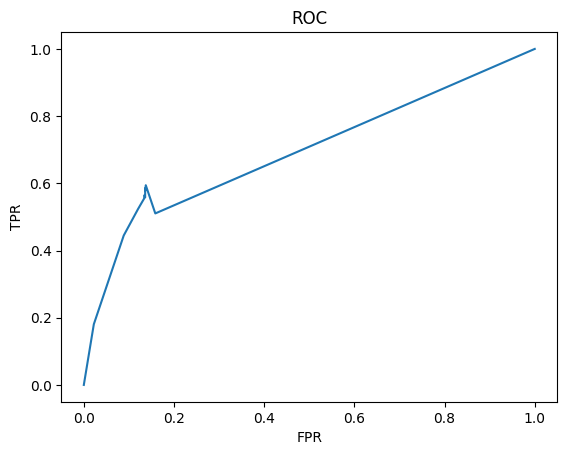

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


ks = [5,25,45,75,105,255,505,1005,1505,2005]
num_fold = 5
kFold=KFold(n_splits=num_fold,random_state=42,shuffle=True)

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
fpr_scores = [0.0]
tpr_scores = [0.0]

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k)
    accuracy_mean = 0
    recall_mean = 0
    precision_mean = 0
    f1_mean = 0
    fpr_mean = 0
    tpr_mean = 0
    for train_idx,test_idx in kFold.split(X):

        X_train, X_test, Y_train, Y_test = X.iloc[train_idx,:], X.iloc[test_idx,:], Y.iloc[train_idx], Y.iloc[test_idx]

        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)

        accuracy_mean += accuracy_score(Y_test, Y_pred)
        recall_mean += recall_score(Y_test, Y_pred)
        precision_mean += precision_score(Y_test, Y_pred)
        f1_mean += f1_score(Y_test, Y_pred)
        fpr_mean += roc_curve(Y_test, Y_pred)[0]
        tpr_mean += roc_curve(Y_test, Y_pred)[1]


    accuracy_scores.append(accuracy_mean / num_fold)
    recall_scores.append(recall_mean / num_fold)
    precision_scores.append(precision_mean / num_fold)
    f1_scores.append(f1_mean / num_fold)
    fpr_scores.append(fpr_mean[1] / num_fold)
    tpr_scores.append(tpr_mean[1] / num_fold)


fpr_scores.append(1.0)
tpr_scores.append(1.0)

for i in range(len(ks)):
    print(f'K = {ks[i]}')
    print(f'Accuracy = {accuracy_scores[i]}')
    print(f'Recall = {recall_scores[i]}')
    print(f'Precision = {precision_scores[i]}')
    print(f'F1 Score = {f1_scores[i]}')
    print("----------------------------------")

# ROC curve
idx = np.argsort(fpr_scores)
tpr_scores = np.array(tpr_scores)[idx]
fpr_scores = np.array(fpr_scores)[idx]

plt.plot(fpr_scores, tpr_scores)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


Based on the ROC curve, choose the best value of k and make a 5 random splits of your data with test_size=0.3 and average the amount of accuracy,recall,precision and F1_score and print them.

In [ ]:
# The best results are obtained at K=75 (nearest point to (0,1) in ROC curve)
k = 75
accuracy_mean = 0
recall_mean = 0
precision_mean = 0
f1_mean = 0

for i in range(5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)

  accuracy_mean += accuracy_score(Y_test, Y_pred)
  recall_mean += recall_score(Y_test, Y_pred)
  precision_mean += precision_score(Y_test, Y_pred)
  f1_mean += f1_score(Y_test, Y_pred)

accuracy_mean /= 5
recall_mean /= 5
precision_mean /= 5
f1_mean /= 5
print(f'K = {k}')
print(f'Average Accuracy = {accuracy_mean}')
print(f'Average Recall = {recall_mean}')
print(f'Average Precision = {precision_mean}')
print(f'Average F1 Score = {f1_mean}')
print("----------------------------------")


K = 75
Average Accuracy = 0.7891150023663037
Average Recall = 0.5686679838348206
Average Precision = 0.615119661850968
Average F1 Score = 0.5905079852894937
----------------------------------


Search about distance weighted knn in the internet. Set the weights parameter of the KNN algorithm to distance and redo the previous parts.

K = 5
Accuracy = 0.7482597667591457
Recall = 0.4975775407047639
Precision = 0.5270514022100394
F1 Score = 0.511423012578111
----------------------------------
K = 25
Accuracy = 0.7746677204980965
Recall = 0.534568970385653
Precision = 0.5821561414535695
F1 Score = 0.5572851568720516
----------------------------------
K = 45
Accuracy = 0.7785012339505775
Recall = 0.5493926659268696
Precision = 0.5883064593194014
F1 Score = 0.5680911139516572
----------------------------------
K = 75
Accuracy = 0.7819084094135105
Recall = 0.5686698503657762
Precision = 0.5926403694698668
F1 Score = 0.5803348435482084
----------------------------------
K = 105
Accuracy = 0.7804886605587458
Recall = 0.5665110488892331
Precision = 0.5898730646947119
F1 Score = 0.577840790244952
----------------------------------
K = 255
Accuracy = 0.7804888621846571
Recall = 0.5637520746208651
Precision = 0.5903137529094662
F1 Score = 0.5765675925894831
----------------------------------
K = 505
Accuracy = 0.782192802761468

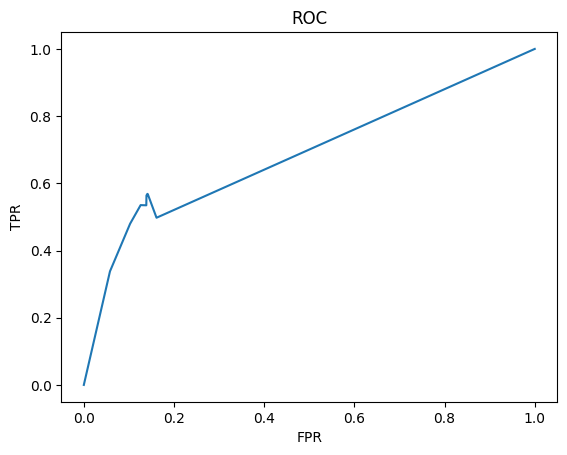

In [ ]:
ks = [5,25,45,75,105,255,505,1005,1505,2005]
num_fold = 5
kFold=KFold(n_splits=num_fold,random_state=42,shuffle=True)

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
fpr_scores = [0.0]
tpr_scores = [0.0]

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k, weights='distance')
    accuracy_mean = 0
    recall_mean = 0
    precision_mean = 0
    f1_mean = 0
    fpr_mean = 0
    tpr_mean = 0
    for train_idx,test_idx in kFold.split(X):

        X_train, X_test, Y_train, Y_test = X.iloc[train_idx,:], X.iloc[test_idx,:], Y.iloc[train_idx], Y.iloc[test_idx]

        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)

        accuracy_mean += accuracy_score(Y_test, Y_pred)
        recall_mean += recall_score(Y_test, Y_pred)
        precision_mean += precision_score(Y_test, Y_pred)
        f1_mean += f1_score(Y_test, Y_pred)
        fpr_mean += roc_curve(Y_test, Y_pred)[0]
        tpr_mean += roc_curve(Y_test, Y_pred)[1]


    accuracy_scores.append(accuracy_mean / num_fold)
    recall_scores.append(recall_mean / num_fold)
    precision_scores.append(precision_mean / num_fold)
    f1_scores.append(f1_mean / num_fold)
    fpr_scores.append(fpr_mean[1] / num_fold)
    tpr_scores.append(tpr_mean[1] / num_fold)


fpr_scores.append(1.0)
tpr_scores.append(1.0)

for i in range(len(ks)):
    print(f'K = {ks[i]}')
    print(f'Accuracy = {accuracy_scores[i]}')
    print(f'Recall = {recall_scores[i]}')
    print(f'Precision = {precision_scores[i]}')
    print(f'F1 Score = {f1_scores[i]}')
    print("----------------------------------")

# ROC curve
idx = np.argsort(fpr_scores)
tpr_scores = np.array(tpr_scores)[idx]
fpr_scores = np.array(fpr_scores)[idx]

plt.plot(fpr_scores, tpr_scores)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
# Again the best results are obtained at K=75
k = 75
accuracy_mean = 0
recall_mean = 0
precision_mean = 0
f1_mean = 0

for i in range(5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

  knn= KNeighborsClassifier(n_neighbors=k, weights='distance')
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)

  accuracy_mean += accuracy_score(Y_test, Y_pred)
  recall_mean += recall_score(Y_test, Y_pred)
  precision_mean += precision_score(Y_test, Y_pred)
  f1_mean += f1_score(Y_test, Y_pred)

accuracy_mean /= 5
recall_mean /= 5
precision_mean /= 5
f1_mean /= 5
print(f'K = {k}')
print(f'Average Accuracy = {accuracy_mean}')
print(f'Average Recall = {recall_mean}')
print(f'Average Precision = {precision_mean}')
print(f'Average F1 Score = {f1_mean}')
print("----------------------------------")

K = 75
Average Accuracy = 0.7805963085660198
Average Recall = 0.5577332425527387
Average Precision = 0.5870791097079476
Average F1 Score = 0.5716143625392177
----------------------------------


Compare the maximum and the minimum F1_score of the 2 versions of KNN algorithm that you used and explain completely about your results.

#for KNN:

max(F1) = 0.602

min(F1) = 0.289

#for WKNN:

max(F1) = 0.580

min(F1) = 0.451

به نظر می‌رسد که در روش وزن دار، تغییرات این معیار کمتر بوده است.

**Question 3:**

In this question we are going to learn how to remove the background of a video with an Unsupervised-learning method by using a distribution estimation algorithm.

With the peace of code below, try to read the video and convert it to a numpy array.

Note : Our video in consist of number of frames that each frame corresponds to an image. Showing these images with a specific frequency will give us the sense of motion. The numpy array that we generate has 4 dimensions. The first dimension belongs to the index of each frame of our video, the second and the third dimensions belong to vertical and horizontal index of the pixel of each frame and the forth belongs to the different color channels of a frame.

For the siplicity down sample the frames of the video by the ratio of 2.

In [8]:
!pip install opencv-python

In [13]:
import cv2
import numpy as np
cap=cv2.VideoCapture("vecteezy_cars-in-the-street-near-the-green-hill_2296117.mp4")
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

video = np.empty((frameCount, frameHeight//2, frameWidth//2, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (frameWidth//2, frameHeight//2))
    video[fc] = frame
    fc += 1

In [14]:
video.shape

(480, 540, 960, 3)

Calculate the mean and standard deviation of each pixel value in the whole video. For the simplicity, do it for each of color channels independently.

In [15]:
mean_val = np.mean(video, axis=0)
std_val = np.std(video, axis=0)

For each frame do these steps :

1. Find the absolute value of the difference between each pixel of the new frame and the mean value that you have caculated for each pixel. Do it for each color channel independently.
2. Calculate the ratio of this value to the standard deviation and consider each pixel as a 3d array which its elements are this ratios. Now, take the norm of this vector for each pixel. If the norm was less than $\beta$  ,consider that pixel as the background. Else consider it as the forground.
4. Display the the forground.

In [27]:
from google.colab.patches import cv2_imshow
cap=cv2.VideoCapture("vecteezy_cars-in-the-street-near-the-green-hill_2296117.mp4")
fc=0
ret=True
beta = 2
# Initialize VideoWriter
output_video_path = 'output_video_1.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_1 = cv2.VideoWriter(output_video_path, fourcc, 30, (frame.shape[1], frame.shape[0]))

for i in range(frameCount):
  frame = video[i]
  # Write your code here
  abs_diff = np.abs(frame - mean_val)
  ratios = abs_diff / std_val
  norms = np.linalg.norm(ratios, axis=2)
  mask = norms >= beta
  foreground = np.where(mask[:, :, None], frame, 0).astype(np.uint8)

  # cv2_imshow(foreground)
  output_video_1.write(foreground)
  # Press Q on keyboard to  exit
  if cv2.waitKey(5) == ord('q'):
    break
  fc+=1

output_video_1.release()
cap.release()
cv2.destroyAllWindows()

<ipython-input-27-3dcbd78a4236>:15: RuntimeWarning: invalid value encountered in divide
  ratios = abs_diff / std_val


Change the beta parameter and answer how this parameter can affect the accuracy of your forground.

In [28]:
beta = 3
# Initialize VideoWriter
output_video_path = 'output_video_2.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_2 = cv2.VideoWriter(output_video_path, fourcc, 30, (frame.shape[1], frame.shape[0]))

for i in range(frameCount):
  frame = video[i]
  # Write your code here
  abs_diff = np.abs(frame - mean_val)
  ratios = abs_diff / std_val
  norms = np.linalg.norm(ratios, axis=2)
  mask = norms >= beta
  foreground = np.where(mask[:, :, None], frame, 0).astype(np.uint8)

  # cv2_imshow(foreground)
  output_video_2.write(foreground)
  # Press Q on keyboard to  exit
  if cv2.waitKey(5) == ord('q'):
    break
  fc+=1

output_video_2.release()
cap.release()
cv2.destroyAllWindows()

<ipython-input-28-74877321287a>:11: RuntimeWarning: invalid value encountered in divide
  ratios = abs_diff / std_val


In [29]:
beta = 1
# Initialize VideoWriter
output_video_path = 'output_video_3.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_3 = cv2.VideoWriter(output_video_path, fourcc, 30, (frame.shape[1], frame.shape[0]))

for i in range(frameCount):
  frame = video[i]
  # Write your code here
  abs_diff = np.abs(frame - mean_val)
  ratios = abs_diff / std_val
  norms = np.linalg.norm(ratios, axis=2)
  mask = norms >= beta
  foreground = np.where(mask[:, :, None], frame, 0).astype(np.uint8)

  # cv2_imshow(foreground)
  output_video_3.write(foreground)
  # Press Q on keyboard to  exit
  if cv2.waitKey(5) == ord('q'):
    break
  fc+=1

output_video_3.release()
cap.release()
cv2.destroyAllWindows()

<ipython-input-29-8fb6a7a77282>:11: RuntimeWarning: invalid value encountered in divide
  ratios = abs_diff / std_val


دیده می‌شود که با افزایش پارامتر بتا، پیکسل‌هایی که تغییرات بیشتری هم دارند از تصویر برداشته می‌شوند و این باعث می‌شود که بخش‌های بیشتری از تصویر پاک بشوند. اگر بتا را خیلی افزایش دهیم خواهیم دید که حتی ماشین‌ها هم که در حال حرکت هستند از تصویر حذف خواهند شد.
مشکل این الگوریتم این هست که به خوبی نمی‌تواند اجسامی که در پس زمینه قرار دارند اما در حال حرکت هستند را حذف کند، به عنوان مثال ابر‌ها را نتوانسته است خوب حذف کند.